In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, \
mean_absolute_error
from sklearn.preprocessing import LabelEncoder

In [2]:
#read in the data with pandas
data = pd.read_csv('used_cars_data-1.csv')

In [3]:
#keeping a copy of the data
df = data.copy()

In [4]:
#have a look at the data
data

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7248,7248,Volkswagen Vento Diesel Trendline,Hyderabad,2011,89411,Diesel,Manual,First,20.54 kmpl,1598 CC,103.6 bhp,5.0,13.23,NaN
7249,7249,Volkswagen Polo GT TSI,Mumbai,2015,59000,Petrol,Automatic,First,17.21 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN
7250,7250,Nissan Micra Diesel XV,Kolkata,2012,28000,Diesel,Manual,First,23.08 kmpl,1461 CC,63.1 bhp,5.0,9.47,NaN
7251,7251,Volkswagen Polo GT TSI,Pune,2013,52262,Petrol,Automatic,Third,17.2 kmpl,1197 CC,103.6 bhp,5.0,10.15,NaN


In [5]:
#we will drop the serial number column as its not needed
data.drop('S.No.', axis=1, inplace=True)


In [6]:
#check for null or missing values
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

In [7]:
#check for the info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7253 non-null   object 
 1   Location           7253 non-null   object 
 2   Year               7253 non-null   int64  
 3   Kilometers_Driven  7253 non-null   int64  
 4   Fuel_Type          7253 non-null   object 
 5   Transmission       7253 non-null   object 
 6   Owner_Type         7253 non-null   object 
 7   Mileage            7251 non-null   object 
 8   Engine             7207 non-null   object 
 9   Power              7078 non-null   object 
 10  Seats              7200 non-null   float64
 11  New_Price          7253 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 736.8+ KB


Power,Engine and Mileage are of object data type, i will strip the SI units and conver to the appropriate data type

In [8]:
#stipping off the SI units of Power and converting to the appropriate data type
data['Power']=pd.to_numeric(data['Power'].str.replace("bhp", ""))

In [9]:
#stipping off the SI units of Engine and converting to the appropriate data type
data['Engine']=pd.to_numeric(data['Engine'].str.replace("CC", ""))

In [10]:
#looking at the mileage colum, we have two si units for it
kmkg = 0
kmpl = 0
for i in data['Mileage']:
    if str(i).endswith("km/kg"):
        kmkg+=1
    elif str(i).endswith("kmpl"):
        kmpl+=1
print('The number of rows with Kmpl : {} '.format(kmpl))
print('The number of rows with Km/Kg : {} '.format(kmkg))

The number of rows with Kmpl : 7177 
The number of rows with Km/Kg : 74 


In [11]:
##checking duplicated values, we have duplicated values
data.duplicated().sum()

1

In [12]:
#dropping the duplicated values
data.drop_duplicates(inplace=True) 

In [13]:
##checking duplicated values, we have duplicated values
data.duplicated().sum()

0

In [14]:
#having a look into the missing values
data[data['Power'].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,17.8 kmpl,1399.0,NaN,5.0,11.685,2.00
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,0.0 kmpl,1086.0,NaN,5.0,4.550,1.30
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,17.0 kmpl,1086.0,NaN,5.0,4.550,2.10
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,17.0 kmpl,1086.0,NaN,5.0,4.550,0.85
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,17.0 kmpl,1086.0,NaN,5.0,4.550,1.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6896,Toyota Etios Liva GD,Hyderabad,2013,86000,Diesel,Manual,First,23.59 kmpl,1364.0,NaN,5.0,8.525,NaN
6902,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.3 kmpl,NaN,NaN,NaN,8.525,NaN
6947,Toyota Etios Liva G,Delhi,2012,77800,Petrol,Manual,First,18.3 kmpl,1197.0,NaN,5.0,8.525,NaN
7092,Hyundai Santro Xing XG AT eRLX Euro III,Coimbatore,2007,64168,Petrol,Automatic,First,17.0 kmpl,1086.0,NaN,5.0,4.550,NaN


In [15]:
#lets see how correlated the variables are
data.corr()

,Year,Kilometers_Driven,Engine,Power,Seats,New_Price,Price
Year,1.000000,-0.187884,-0.054726,0.013448,0.008166,-0.006323,0.305327
Kilometers_Driven,-0.187884,1.000000,0.094816,0.030165,0.090218,0.015497,-0.011493
Engine,-0.054726,0.094816,1.000000,0.859777,0.399256,0.697206,0.658354
Power,0.013448,0.030165,0.859777,1.000000,0.095910,0.803484,0.772566
Seats,0.008166,0.090218,0.399256,0.095910,1.000000,0.037504,0.052225
New_Price,-0.006323,0.015497,0.697206,0.803484,0.037504,1.000000,0.763362
Price,0.305327,-0.011493,0.658354,0.772566,0.052225,0.763362,1.000000


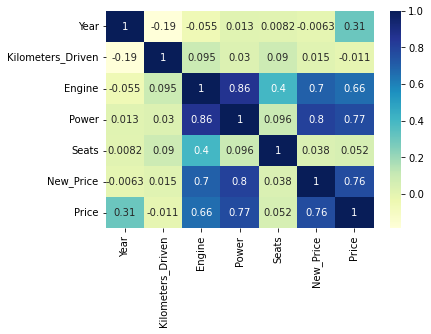

In [16]:
# plotting correlation heatmap
dataplot = sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [17]:
#calling the mileage column
data['Mileage']

0       26.6 km/kg
1       19.67 kmpl
2        18.2 kmpl
3       20.77 kmpl
4        15.2 kmpl
           ...    
7248    20.54 kmpl
7249    17.21 kmpl
7250    23.08 kmpl
7251     17.2 kmpl
7252     10.0 kmpl
Name: Mileage, Length: 7252, dtype: object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   float64
 9   Power              7077 non-null   float64
 10  Seats              7199 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 793.2+ KB


In [19]:
#fixing mileage
New_Mileage= []
for i in data.Mileage:
    if str(i).endswith('km/kg'):
        i = i[:-5]
        i = float(i)*1.40
        New_Mileage.append(float(i))
    elif str(i).endswith('kmpl'):
        i = i[:-5]
        New_Mileage.append(float(i))
        #print(i)

In [20]:
#spliting the numeric and unit
split_mileage = data['Mileage'].str.split(" ", n = 1, expand = True)
split_mileage.head()

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl


In [21]:
#assigning the numeric part of mileage to the column after splitting
data['Mileage'] = split_mileage[0]

In [22]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6,998.0,58.16,5.0,5.51,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,16.06,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2,1199.0,88.70,5.0,8.61,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77,1248.0,88.76,7.0,11.27,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968.0,140.80,5.0,53.14,17.74


In [23]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1233
dtype: int64

In [24]:
#the two columns with NAN will be filled with median
data[data["Mileage"].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,NaN,72.0,41.0,5.0,13.58,13.00
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,NaN,1798.0,73.0,5.0,24.01,12.75


In [25]:
#fixing the missing values in milleage, seats,engine and power
data['Mileage'] =data['Mileage'].fillna(data['Mileage'].median())

In [26]:
#fixing the missing values in milleage, seats,engine and power
data['Seats'] =data['Seats'].fillna(data['Seats'].median())

In [27]:
#fixing the missing values in milleage, seats,engine and power
data['Engine'] =data['Engine'].fillna(data['Engine'].median())

In [28]:
#fixing the missing values in milleage, seats,engine and power
data['Power'] =data['Power'].fillna(data['Power'].median())

In [29]:
#no missing values now
data['Mileage'].isnull().sum()

0

In [30]:
#now we have only missing values in our target which we will drop
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price               0
Price                1233
dtype: int64

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7252 non-null   object 
 8   Engine             7252 non-null   float64
 9   Power              7252 non-null   float64
 10  Seats              7252 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 793.2+ KB


In [61]:
#converting mileage column to float
data['Mileage'] = data['Mileage'].astype(str).astype(float)

In [45]:
data.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                  0
Power                   0
Seats                   0
New_Price               0
Price                1233
dtype: int64

In [52]:
#dropping the missing values in price
data.dropna(inplace = True)

In [53]:
data.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
New_Price            0
Price                0
dtype: int64

In [54]:
#checking the price column
data['Price']

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 6019, dtype: float64

In [62]:
#to get more info on the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  New_Price          6019 non-null   float64
 12  Price              6019 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 658.3+ KB


<AxesSubplot:>

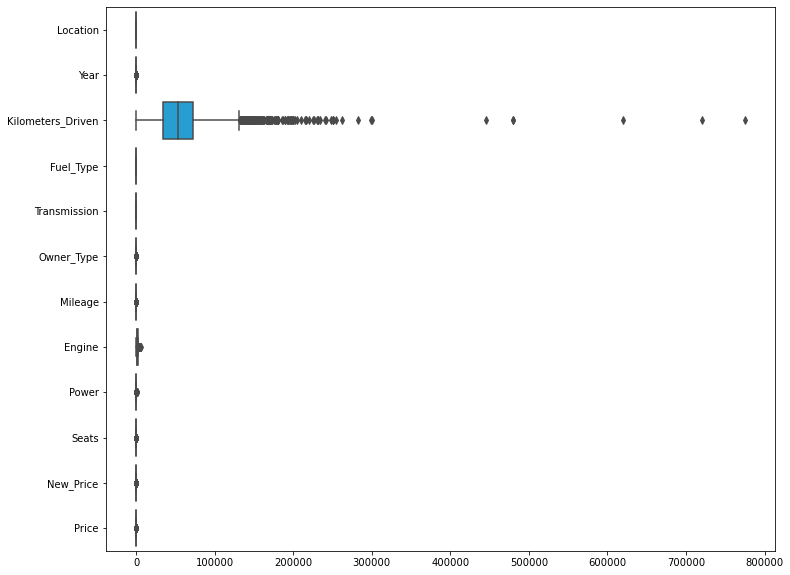

In [105]:
plt.figure(figsize=(12,10))
sns.boxplot(data=data, palette='rainbow', orient ='h')

In [106]:
#treating outliers
data = data[data['Kilometers_Driven']< 6000000]

<AxesSubplot:>

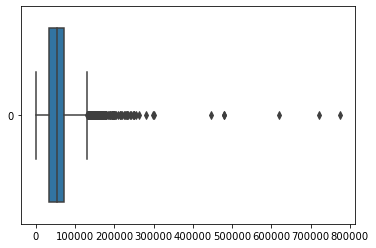

In [107]:
#checking for outliers
sns.boxplot(data=data["Kilometers_Driven"], orient="h")

In [108]:
data.shape

(6018, 13)

Building a machine model

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6018 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6018 non-null   object 
 1   Location           6018 non-null   object 
 2   Year               6018 non-null   int64  
 3   Kilometers_Driven  6018 non-null   int64  
 4   Fuel_Type          6018 non-null   object 
 5   Transmission       6018 non-null   object 
 6   Owner_Type         6018 non-null   object 
 7   Mileage            6018 non-null   float64
 8   Engine             6018 non-null   float64
 9   Power              6018 non-null   float64
 10  Seats              6018 non-null   float64
 11  New_Price          6018 non-null   float64
 12  Price              6018 non-null   float64
dtypes: float64(6), int64(2), object(5)
memory usage: 787.3+ KB


In [74]:
#machine learning doesnt take text, so we have to encode i

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'Fuel_Type' column
data['Fuel_Type']= lab.fit_transform(data['Fuel_Type'])

In [75]:
#machine learning doesnt take text, so we have to encode i

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'Location' column
data.loc[:,['Location']] = lab.fit_transform(data.loc[:,['Location']])

C:\Users\halimat badmus_bashi\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [76]:
#machine learning doesnt take text, so we have to encode i

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'Year' column
data.loc[:,['Year']] = lab.fit_transform(data.loc[:,['Year']])

In [77]:
#machine learning doesnt take text, so we have to encode i

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'Transmission' column
data.loc[:,['Transmission']] = lab.fit_transform(data.loc[:,['Transmission']])

In [78]:
#machine learning doesnt take text, so we have to encode i

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'Owner_Type' column
data.loc[:,['Owner_Type']] = lab.fit_transform(data.loc[:,['Owner_Type']])

In [111]:
#machine learning doesnt take text, so we have to encode i

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'Transmission' column
data.loc[:,['Name']] = lab.fit_transform(data.loc[:,['Name']])

C:\Users\halimat badmus_bashi\Anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [112]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,1200,9,12,72000,0,1,0,26.60,998.0,58.16,5.0,5.51,1.75
1,512,10,17,41000,1,1,0,19.67,1582.0,126.20,5.0,16.06,12.50
2,486,2,13,46000,4,1,0,18.20,1199.0,88.70,5.0,8.61,4.50
3,1059,2,14,87000,1,1,0,20.77,1248.0,88.76,7.0,11.27,6.00
4,23,3,15,40670,1,0,2,15.20,1968.0,140.80,5.0,53.14,17.74


In [114]:
data['Name'].value_counts()

924     49
1159    45
419     34
1135    34
1160    31
        ..
879      1
713      1
1675     1
106      1
932      1
Name: Name, Length: 1876, dtype: int64

In [118]:
#dropping the target variable
X = data.drop(['Price'], axis =1)
Y=data['Price']

In [119]:
#splitting the data sets into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2,random_state =0)

In [120]:
#Checking the test and train shape
X_test.shape

(1204, 12)

In [121]:
X_train.shape

(4814, 12)

In [122]:
#checking to see price has been dropped
X_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
1771,1098,9,16,59451,4,1,0,18.50,1197.0,85.8,5.0,7.88
36,1183,7,20,50075,1,1,0,24.30,1248.0,88.5,5.0,11.12
806,270,3,19,59636,1,0,0,10.91,3198.0,197.0,7.0,35.29
1442,419,4,11,231673,4,1,0,17.00,1497.0,118.0,5.0,13.58
1819,48,5,17,56000,1,0,0,14.16,1968.0,174.3,5.0,53.14


(0.0, 160.0)

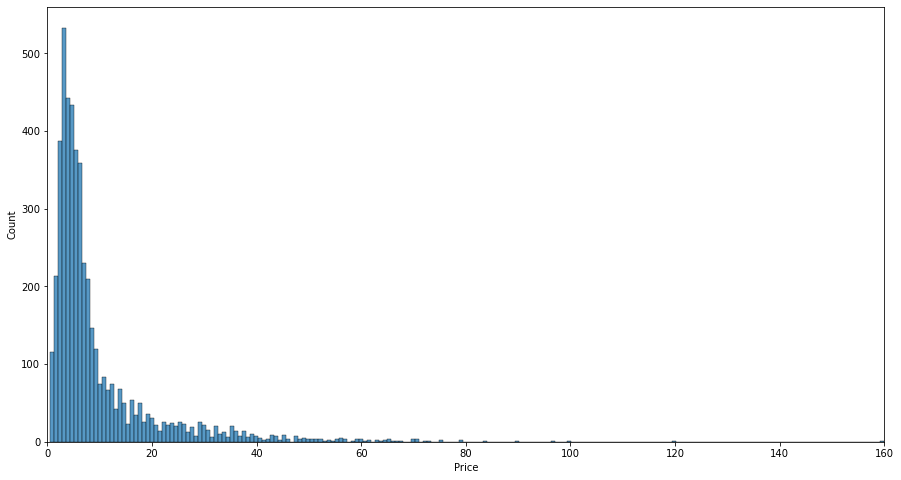

In [123]:
#This shows the price is right_skewed
plt.subplots(figsize=(15,8))
sns.histplot(Y_train)
plt.xlim([0,160])

In [138]:
#the data is right skewed, so we need to scale the target
data['Price'] = np.log(data['Price'])

C:\Users\halimat badmus_bashi\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\halimat badmus_bashi\Anaconda3\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [139]:
#checking the descriptive statistics of the data
data.describe()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
count,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,6018.000000,5941.000000
mean,916.102692,5.620306,15.357594,57668.047690,2.363244,0.714357,0.379528,18.135329,1620.281157,112.771505,5.276836,21.494276,-inf
std,529.764268,2.955810,3.269677,37878.783175,1.504961,0.451758,0.818512,4.581823,599.424157,53.283280,0.806405,24.331095,NaN
min,0.000000,0.000000,0.000000,171.000000,0.000000,0.000000,0.000000,0.000000,72.000000,34.200000,0.000000,3.910000,-inf
25%,472.000000,3.000000,13.000000,34000.000000,1.000000,0.000000,0.000000,15.170000,1198.000000,78.000000,5.000000,7.880000,0.225351
50%,924.000000,6.000000,16.000000,53000.000000,1.000000,1.000000,0.000000,18.160000,1493.000000,94.000000,5.000000,11.300000,0.554153
75%,1314.000000,8.000000,18.000000,73000.000000,4.000000,1.000000,0.000000,21.100000,1969.000000,138.030000,5.000000,21.770000,0.834032
max,1875.000000,10.000000,21.000000,775000.000000,4.000000,1.000000,3.000000,33.540000,5998.000000,560.000000,10.000000,375.000000,1.624361


In [140]:
#checking the correlation of the data after cleaning
data.corr()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
Name,1.000000,0.025079,0.013237,0.105401,-0.069202,0.137766,-0.027865,-0.018870,0.020365,-0.148060,0.157058,-0.133627,-0.025682
Location,0.025079,1.000000,-0.019895,-0.068416,0.114885,0.039866,-0.033988,0.018680,-0.078178,-0.065087,-0.037682,-0.063298,-0.123161
Year,0.013237,-0.019895,1.000000,-0.448519,-0.129380,-0.096796,-0.386121,0.321660,-0.050537,0.026149,0.015269,-0.007689,0.540120
Kilometers_Driven,0.105401,-0.068416,-0.448519,1.000000,-0.222501,0.106542,0.205700,-0.143888,0.154392,-0.000468,0.209183,0.001297,-0.172679
Fuel_Type,-0.069202,0.114885,-0.129380,-0.222501,1.000000,0.125015,0.042951,-0.152210,-0.401641,-0.266099,-0.299381,-0.282174,-0.386445
Transmission,0.137766,0.039866,-0.096796,0.106542,0.125015,1.000000,0.002880,0.333045,-0.498913,-0.640983,0.074764,-0.621987,-0.507391
Owner_Type,-0.027865,-0.033988,-0.386121,0.205700,0.042951,0.002880,1.000000,-0.154231,0.048045,0.023823,0.002192,0.034861,-0.211005
Mileage,-0.018870,0.018680,0.321660,-0.143888,-0.152210,0.333045,-0.154231,1.000000,-0.586492,-0.495452,-0.299667,-0.414971,-0.162687
Engine,0.020365,-0.078178,-0.050537,0.154392,-0.401641,-0.498913,0.048045,-0.586492,1.000000,0.860387,0.393674,0.697406,0.572805
Power,-0.148060,-0.065087,0.026149,-0.000468,-0.266099,-0.640983,0.023823,-0.495452,0.860387,1.000000,0.103202,0.791851,0.620239


In [141]:
#we will now normalize our data before building the model
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [142]:
#creating instance for linear regression
lin_reg = LinearRegression()
lin_reg.fit(X_train_sc, Y_train)

LinearRegression()

In [143]:
#checking the coefficients of the lin_reg
lin_reg.coef_

array([ 0.23908179, -0.65178444,  3.06881333, -0.76698115, -0.8243672 ,
       -0.38845898, -0.04618882, -0.71687753,  0.5163263 ,  3.72880966,
       -0.5986473 ,  4.33603904])

In [145]:
#checking the accuracy score
print('Train Accuracy: {:.4f}'.format(lin_reg.score(X_train_sc,Y_train)))
print('Test Accuracy: {:.4f}'.format(lin_reg.score(X_test_sc,Y_test)))

Train Accuracy: 0.7554
Test Accuracy: 0.7534


In [146]:
#checking r2 score, we need to make predictions first
pred = lin_reg.predict(X_test_sc)
r2_score(Y_test, pred)

0.7534194996271855

In [147]:
#making predictions to check our error
predict_train = lin_reg.predict(X_train_sc)
predict_test = lin_reg.predict(X_test_sc)

In [148]:
#checking the mean squared error
print('Train error: {:.4f}'.format(mean_squared_error(Y_train,predict_train)))
print('Test error: {:.4f}'.format(mean_squared_error(Y_test,predict_test)))

Train error: 29.7142
Test error: 33.8731


In [149]:
#using ridge regression model to analyse and determine whuch works better
from sklearn.linear_model import Ridge

In [152]:
#ridge is giving us exactly same as linear regression as it cant find any variables with multi collinearity
ridge = Ridge()
ridge.fit(X_train_sc,Y_train)
print('Train Accuracy: {:.4f}'.format(ridge.score(X_train_sc,Y_train)))
print('Test Accuracy: {:.4f}'.format(ridge.score(X_test_sc,Y_test)))

Train Accuracy: 0.7554
Test Accuracy: 0.7534


In [157]:
# function to compute different metrics to check performance of a regression model
model_perform_train = model_performance_regression(lin_reg, X_train_sc, Y_train)

In [158]:
model_perform_train

,RMSE,MAE,R-squared,Adj. R-squared
0,5.451076,3.100062,0.755377,0.754766


In [159]:
# function to compute different metrics to check performance of a regression model
model_perform_test = model_performance_regression(lin_reg, X_test_sc, Y_test)

In [160]:
model_perform_test

,RMSE,MAE,R-squared,Adj. R-squared
0,5.820059,3.186455,0.753419,0.750935



The model is able to explain 75% of the variation in the the used car prices prediction

In [164]:
# function to compute adjusted R-squared
adj_r2 = adj_r2_score(X_train_sc, Y_train, predict_train)

In [165]:
adj_r2

0.7547656630899733

With the help of this Machine learning model, car sellers will be able to determine the values of used cars brought into their workshop by clients.
This will help them save time on manual processes and boost overall effectiveness.